# Assignment10

# 20142740 박세인

# https://github.com/dkdvkd/assignment10

# import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# given data

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# do normalize, get distance

In [3]:
# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)


# example of distance function between two vectors x and y
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

# train data: label and image

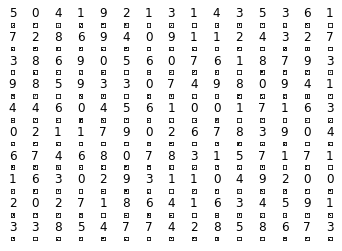

In [4]:
# make a matrix each column of which represents an images in a vector form 
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

count = 0

for line in data_train:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1
    
# plot first 150 images out of 10,000 with their labels

f1 = plt.figure(1)
for i in range(150):
    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(10, 15, i+1)#i+1
    plt.subplots_adjust(hspace=5.5, wspace=0.3)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')


    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.tight_layout()
plt.show()


# test data

In [5]:
list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# average image of each label

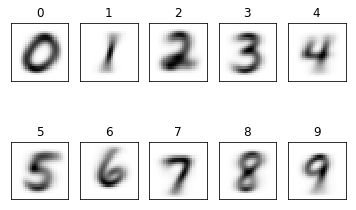

In [6]:
# plot the average image of all the images for each digit
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):
    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1
    plt.imshow(list_image_train[:, i].reshape((size_row, size_col)),cmap='Greys', interpolation='None')


for i in range(10):
    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# feature function

In [7]:
def makeR(p):
    mu, sigma = 0, 1 # mean and standard deviation
    R = []           
    for i in range(p):
        s = np.random.normal(mu, sigma, size_row * size_col)
        R.append(s)
    return R

def makeAforTrain(R):
    A = np.array(R)
    A = np.matmul(A, list_image_train)
    A = np.transpose(A)
    return A

def makeAforTest(R):
    A = np.array(R)
    A = np.matmul(A, list_image_test)
    A = np.transpose(A)
    return A

# define 10 y

In [8]:
y_trains = []

# label : 0 ~ 9
for label in range(10):
    y_train = np.empty(num_train) # train label
    for i in range(num_train):    
        if list_label_train[i] != label: #if label: correct
            y_train[i] = -1              # assign - 1
        else:                          #if label: incorrect
            y_train[i] = 1               # assign 1
        
    y_trains.append(y_train)
        
print(list_label_train)

for i in range(10):
    print("y: {0} classification: {list} ".format(i, list=y_trains[i]))

[5 0 4 ... 5 6 8]
y: 0 classification: [-1.  1. -1. ... -1. -1. -1.] 
y: 1 classification: [-1. -1. -1. ... -1. -1. -1.] 
y: 2 classification: [-1. -1. -1. ... -1. -1. -1.] 
y: 3 classification: [-1. -1. -1. ... -1. -1. -1.] 
y: 4 classification: [-1. -1.  1. ... -1. -1. -1.] 
y: 5 classification: [ 1. -1. -1. ...  1. -1. -1.] 
y: 6 classification: [-1. -1. -1. ... -1.  1. -1.] 
y: 7 classification: [-1. -1. -1. ... -1. -1. -1.] 
y: 8 classification: [-1. -1. -1. ... -1. -1.  1.] 
y: 9 classification: [-1. -1. -1. ... -1. -1. -1.] 


# parameter  $\theta$

In [9]:
def solve_model_parameter(A,b):
    if  np.shape(b)[0] !=1:
        numdata = np.shape(b)[0]
        b = b.reshape((numdata, 1))
    numfeature = np.shape(A)[1]
    Q ,R = np.linalg.qr(A)
    q =np.matmul(Q.T, b)
    theta_vector = np.zeros((numfeature,1),dtype=float)
    for i in range(numfeature):
        n = numfeature - i # 1<=n <= numfeature (decreasing)
        if R[n-1,n-1] == 0 : # R_(n,n)
            theta_vector[n-1,0] = 0 # theta_vector_(n,1)
        else:
            rthetasum =0 
            for j in range (numfeature-n):
                l = numfeature- j # 1<= l <=N ( decreasing )
                rthetasum += R[n -1 ,l-1]*theta_vector[l-1,0]
            theta_vector[n-1,0] = (q[n-1,0] - rthetasum)/R[n-1,n-1]
    return theta_vector

# classifier

In [10]:
def classifier(p):
    
    r = makeR(p)                # r
    A_train = makeAforTrain(r)  # A for train
    o = []                      # 10개의 model parameter
    for i in range(10):
        o.append(solve_model_parameter(A_train,y_trains[i])) # find model parameter
        
    A_test = makeAforTest(r)    # A for test
    predicted_y = []            # 10개의 값
    for i in range(10):
        predicted_y.append(np.matmul(A_test, o[i]))
    # 10개 중 가장 큰 값
    predicted = np.empty(num_test, dtype=int)
    for i in range(num_test):
        best = 0 #predicted_y[0][i]
        for j in range(1,10):
            if predicted_y[best][i] < predicted_y[j][i]:
                best = j
        predicted[i] = best
        
    list = np.zeros((10,10), dtype=int)
        
    for i in range(num_test):
        pred = predicted[i]
        ans = list_label_test[i]
        list[pred][ans] += 1 
    
    df = pd.DataFrame({'0':list[0,:],'1':list[1,:],'2':list[2,:]
                       ,'3':list[3,:],'4':list[4,:],'5':list[5,:]
                       ,'6':list[6,:],'7':list[7,:]
                     ,'8':list[8,:],'9':list[9,:]})       
    return df

cfmatrix = classifier(2**10) # p= 2^10
print(cfmatrix)

     0     1    2    3    4    5    6    7    8    9
0  933     1    3    4    1    8   18    1    8    3
1    0  1102    6    1    4    2    4    0   15    1
2   17    53  798   32   18    1   46   20   42    5
3    8    14   31  848    3   19   10   30   32   15
4    3    19    7    4  859    4    7    2   16   61
5   18    15    5  107   14  589   22   15   82   25
6   25     8    7    0   16   25  866    0   11    0
7    4    34   20    7   24    0    1  873    1   64
8   18    47   12   39   36   56   14   12  716   24
9   17    11    3   18   64    3    0   80   12  801


# get score

In [11]:
def f1score(matrix):
    f1 = np.empty(10)
    for i in range(10):
        tp = 0
        fp = 0
        fn = 0
        precision = 0
        recall = 0
        for j in range(10):        
            if i == j:
                tp = tp + matrix.iloc[i,j]
            elif i != j:
                fn = fn + matrix.iloc[i,j]
            elif i != j:
                fp = fp + matrix.iloc[j,i]
            
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
    
        f1[i] = 2 * (precision * recall) / (precision + recall)
        
    return np.mean(f1)

print(f1score(cfmatrix))

0.9074662493188853


# different parameters

In [12]:
maxp = 0
maxf = 0

for i in [2**7, 2**8, 2**9, 2**10, 2**11]: 
    matrix = classifier(i)
    print("p: {}".format(i))
    print(matrix)
    print("score: {}".format(f1score(matrix)))
    print("---------------------------------------------------")
    
    if(f1score(matrix)>maxf):
        maxf = f1score(matrix)
        maxp = i
        

p: 128
     0     1    2    3    4    5    6    7    8    9
0  934     0    6    2    0    7   18    3   10    0
1    0  1099    2    2    2    2    5    1   22    0
2   17    62  798   24   14    2   34   29   45    7
3    8    18   28  853    3   13   11   35   29   12
4    2    24    7    4  839    6   15    2   13   70
5   24    20    8  123   29  531   32   23   75   27
6   18    10    8    1   16   15  885    1    4    0
7    2    46   18    7   16    0    2  884    4   49
8   17    61   11   42   24   33   23   24  722   17
9   17    16   10   18   75    2    3   65   10  793
score: 0.9032117908348141
---------------------------------------------------
p: 256
     0     1    2    3    4    5    6    7    8    9
0  940     1    1    2    0    9   17    1    9    0
1    0  1102    5    1    1    2    5    2   17    0
2   18    58  802   28   16    1   43   19   43    4
3    5    17   25  876    3   14   13   29   18   10
4    0    23    7    1  868    3   11    3   16   50
5   20 

# find max

In [13]:
print("maximum of p: ",maxp)
print("maximum of f: ",maxf)

maximum of p:  512
maximum of f:  0.9176430234655646
